# Классификация гендера человека - прогнозирование пола





## Постановка задачи

Нужно спрогнозировать, какого пола человек. Предоставлена информация о любимых вещах человека. 

## Загрузка библиотек

In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

## Парсинг данных

In [3]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv("Transformed Data Set - Sheet1.csv", sep = ',')


In [4]:
df2 = pd.read_csv("df.csv", sep=';')

In [5]:
df.head(20)



,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
5,Warm,Jazz/Blues,Doesn't drink,Fanta,F
6,Cool,Pop,Beer,Coca Cola/Pepsi,F
7,Warm,Pop,Whiskey,Fanta,F
8,Warm,Rock,Other,7UP/Sprite,F
9,Neutral,Pop,Wine,Coca Cola/Pepsi,F


In [6]:
df2.head(20)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Hip hop,Doesn't drink,Coca Cola/Pepsi,M
1,Neutral,Pop,Whiskey,Coca Cola/Pepsi,M
2,Neutral,Electronic,Doesn't drink,Coca Cola/Pepsi,M
3,Cool,Jazz/Blues,Doesn't drink,Coca Cola/Pepsi,F
4,Cool,Pop,Whiskey,7UP/Sprite,M
5,Cool,Electronic,Doesn't drink,Coca Cola/Pepsi,F
6,Cool,Rock,Beer,Coca Cola/Pepsi,M
7,Neutral,R&B and soul,Whiskey,7UP/Sprite,M
8,Warm,Rock,Vodka,7UP/Sprite,M
9,Neutral,Rock,Beer,Coca Cola/Pepsi,F


In [7]:
df2.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [8]:
df = pd.concat([df,df2], axis=0)

In [9]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


## Описание данных

* Favorite Color - температура любимого цвета
* Favorite Music Genre - любимый жанр музыки
* Favorite Beverage - любимый напиток
* Favorite Soft Drink - любимый безалкогольный напиток

Целевой признак: 

* Gender - пол

## Разведочный анализ данных

In [10]:
# вывод размерности
df.shape

(154, 5)

датафрейм содержит 154 строк и 5 столбцов

In [11]:
# вывод информаци о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 87
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        154 non-null    object
 1   Favorite Music Genre  154 non-null    object
 2   Favorite Beverage     154 non-null    object
 3   Favorite Soft Drink   154 non-null    object
 4   Gender                154 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


Набор данных имеет 154 записей типа object. Пропущенных значений нет.

In [12]:
# выводим типы данных
df.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [13]:
# описательная статистика 
df.describe().T

,count,unique,top,freq
Favorite Color,154,3,Cool,71
Favorite Music Genre,154,7,Pop,49
Favorite Beverage,154,6,Doesn't drink,54
Favorite Soft Drink,154,4,Coca Cola/Pepsi,73
Gender,154,2,F,81


In [15]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [16]:
df['Favorite Color'].value_counts()


Favorite Color
Cool       71
Neutral    42
Warm       41
Name: count, dtype: int64

In [17]:
df['Favorite Music Genre'].value_counts()


Favorite Music Genre
Pop                 49
Rock                39
Hip hop             22
Electronic          16
R&B and soul        13
Jazz/Blues           8
Folk/Traditional     7
Name: count, dtype: int64

In [18]:
df['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    54
Beer             31
Wine             21
Vodka            17
Whiskey          17
Other            14
Name: count, dtype: int64

In [19]:
df['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    73
Other              29
7UP/Sprite         26
Fanta              26
Name: count, dtype: int64

In [20]:
df["Gender"].value_counts()


Gender
F    81
M    73
Name: count, dtype: int64

Каких-то некорректных значений не замечено, количество мужчин и женщин немного отличаются


## Визуальный анализ

In [21]:
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
83,Neutral,R&B and soul,Wine,Coca Cola/Pepsi,F
84,Neutral,Pop,Doesn't drink,Other,M
85,Neutral,Hip hop,Doesn't drink,Coca Cola/Pepsi,M
86,Cool,Pop,Wine,Other,F


<Axes: xlabel='Gender,Favorite Color'>

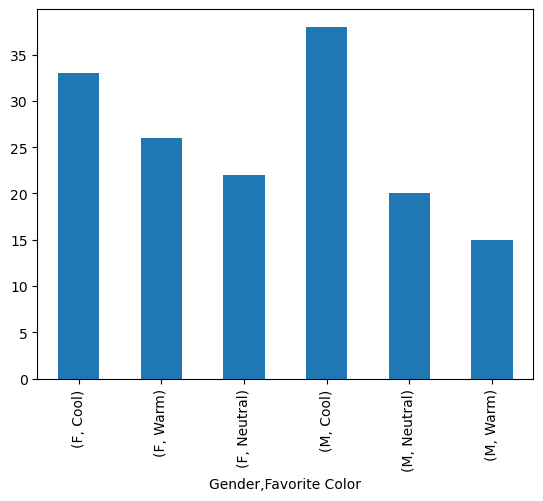

In [22]:
df.groupby('Gender')['Favorite Color'].value_counts().plot.bar()

<Axes: xlabel='Gender,Favorite Music Genre'>

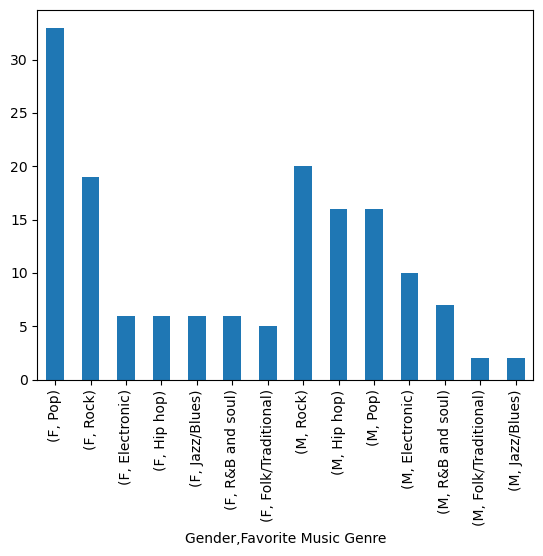

In [23]:
df.groupby('Gender')['Favorite Music Genre'].value_counts().plot.bar()

<Axes: xlabel='Gender,Favorite Beverage'>

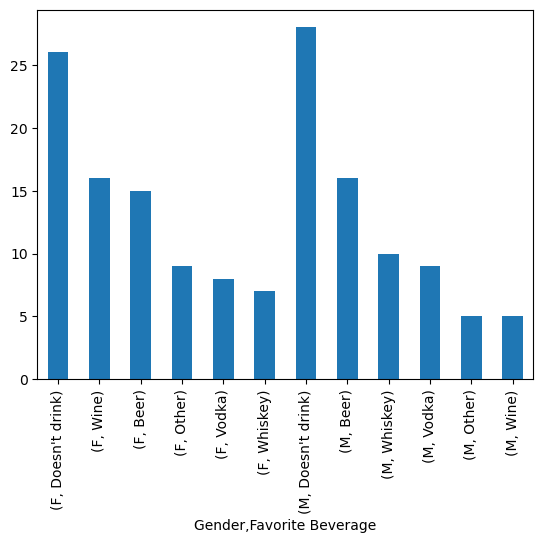

In [24]:
df.groupby('Gender')['Favorite Beverage'].value_counts().plot.bar()

<Axes: xlabel='Gender,Favorite Soft Drink'>

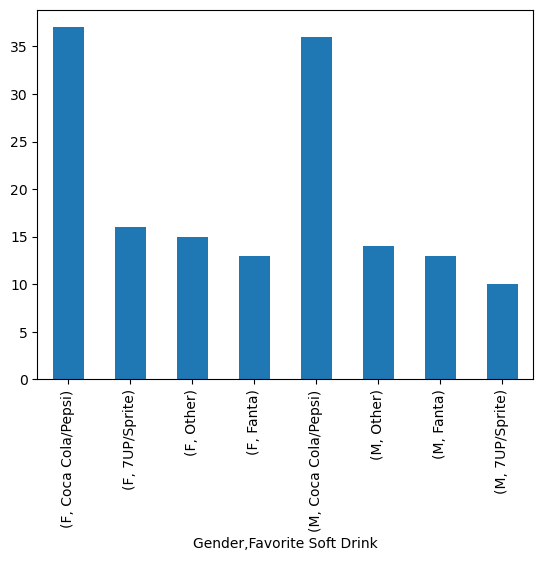

In [25]:
df.groupby('Gender')['Favorite Soft Drink'].value_counts().plot.bar()

In [26]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
le = LabelEncoder()
for col in df.columns:
    data[col] = le.fit_transform(df[col])
    
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
83,1,5,5,1,0
84,1,4,1,3,1
85,1,2,1,1,1
86,0,4,5,3,0


array([[<Axes: title={'center': 'Favorite Color'}>,
        <Axes: title={'center': 'Favorite Music Genre'}>],
       [<Axes: title={'center': 'Favorite Beverage'}>,
        <Axes: title={'center': 'Favorite Soft Drink'}>],
       [<Axes: title={'center': 'Gender'}>, <Axes: >]], dtype=object)

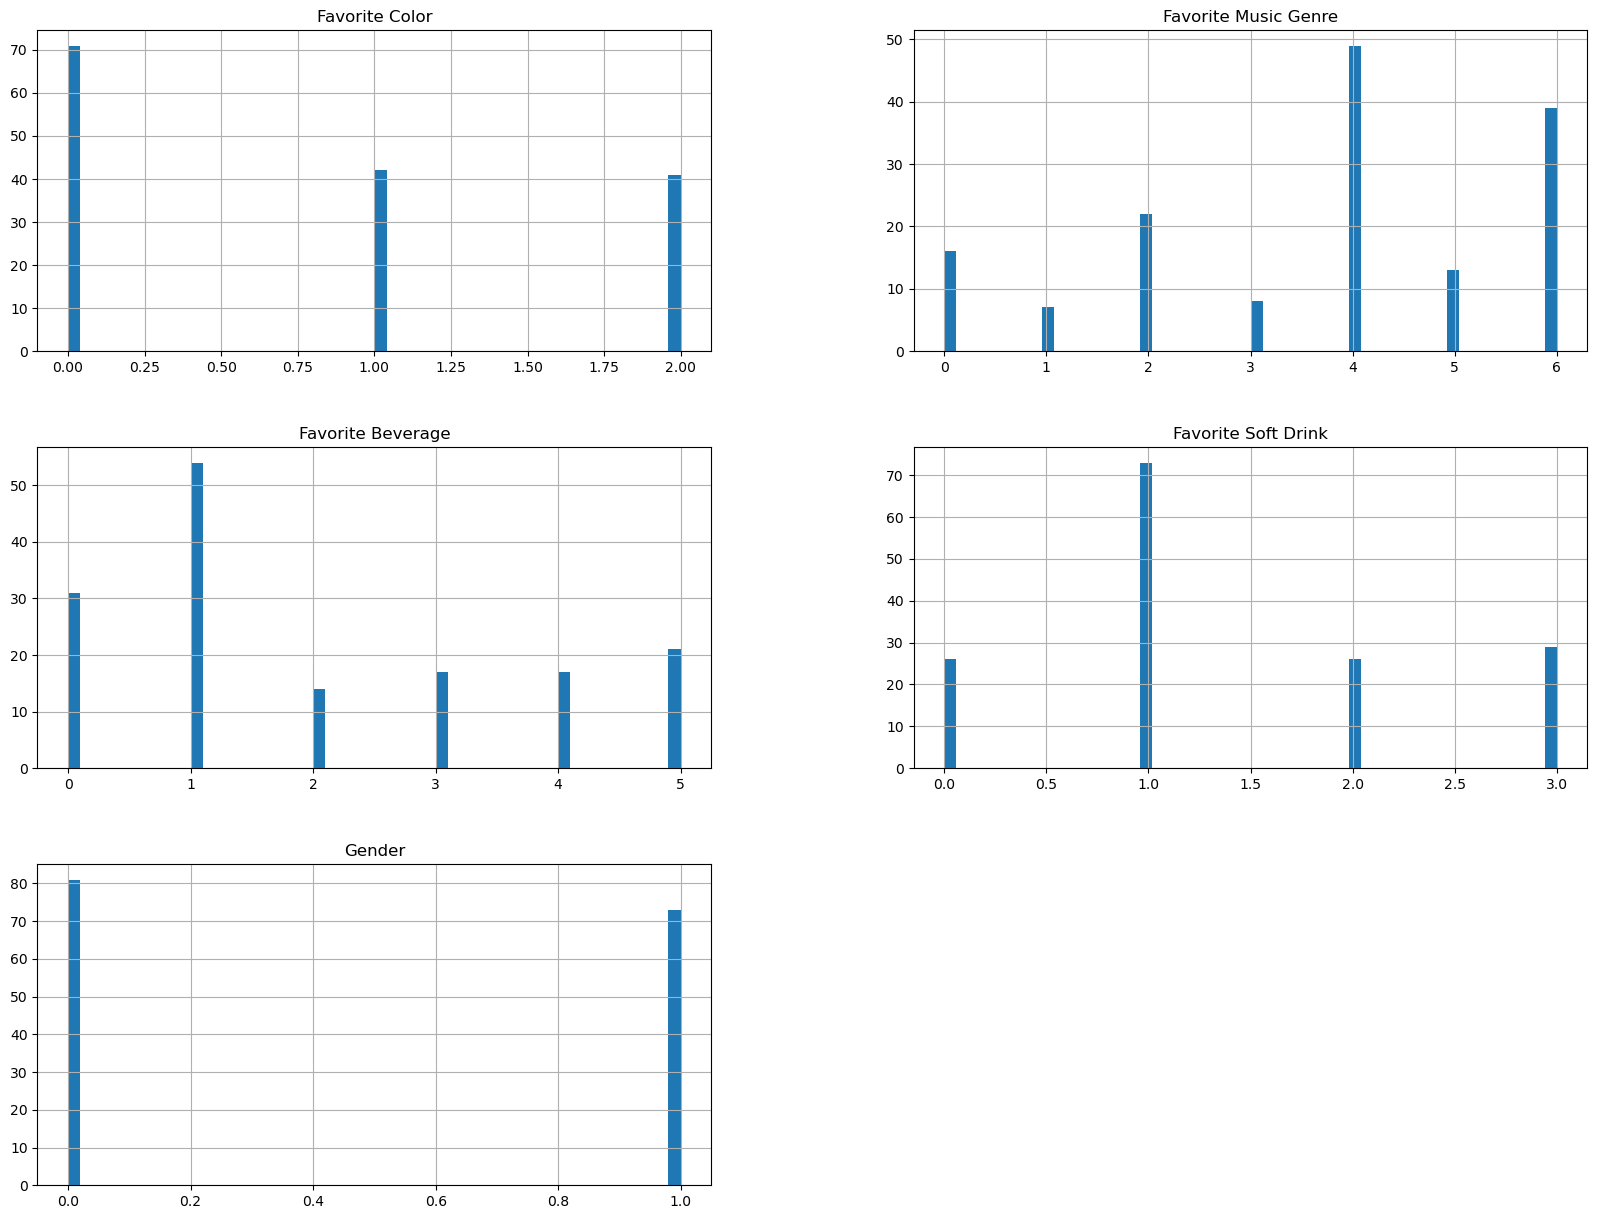

In [27]:
data.hist(figsize = (20,15), bins = 50)

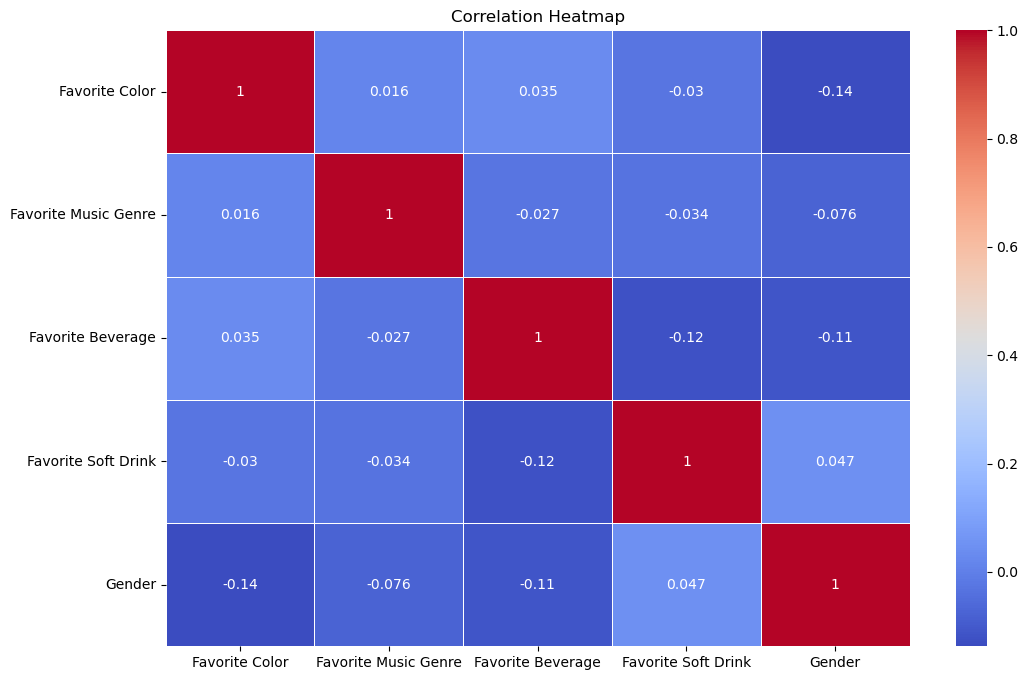

In [28]:
corr_matrix = data.corr()

# Создание тепловой таблицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

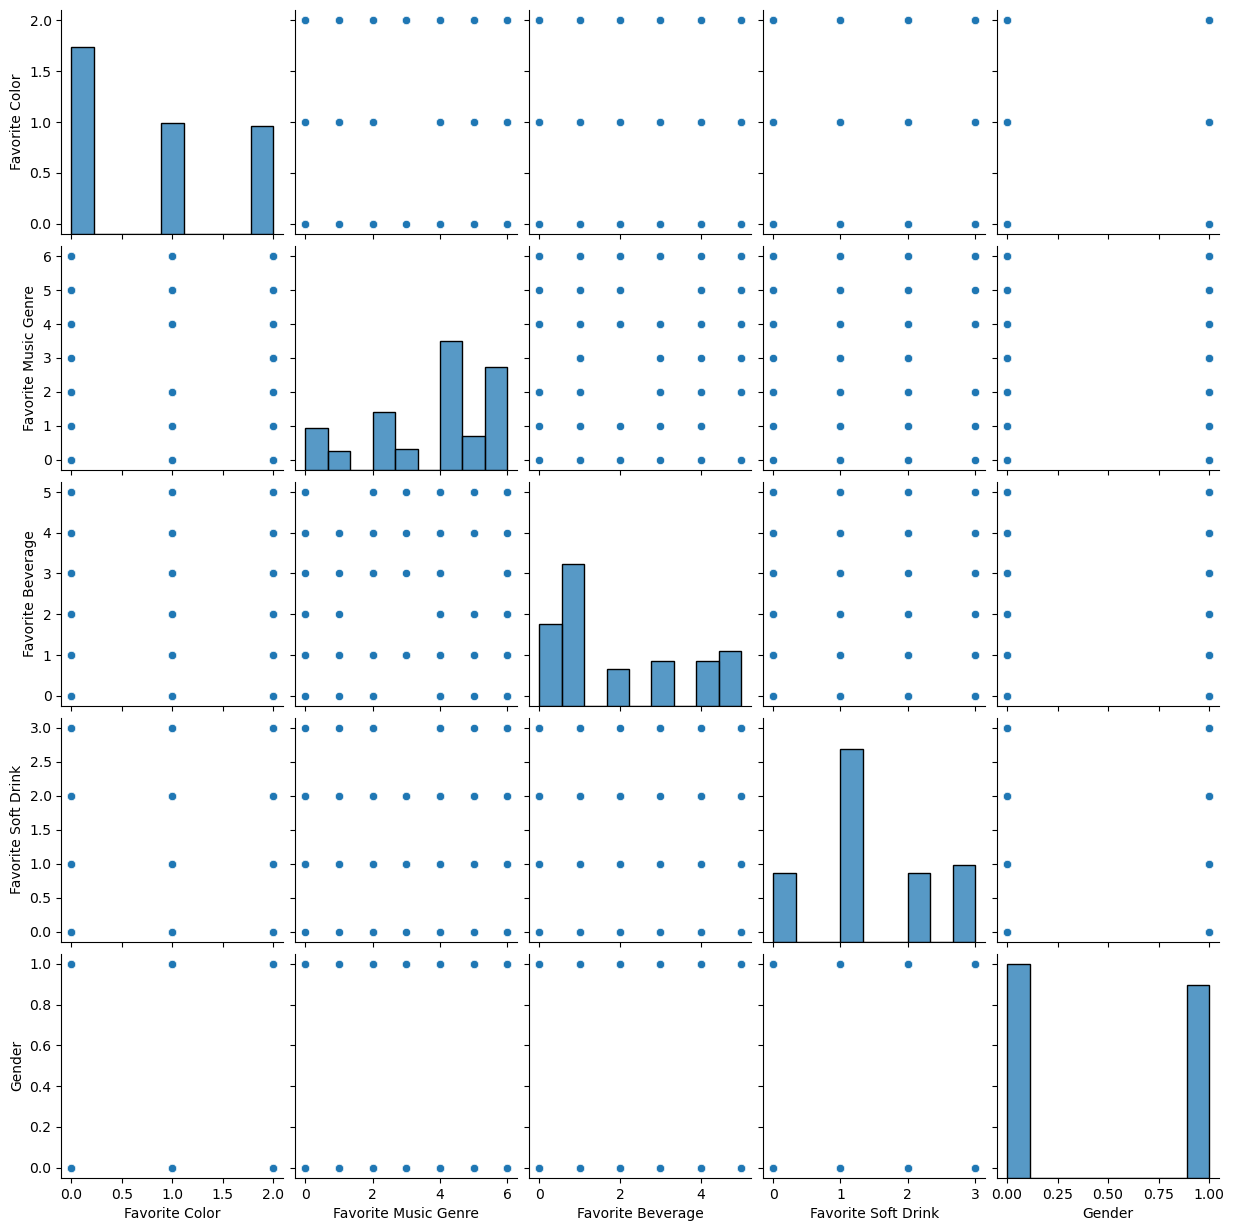

In [29]:
sns.pairplot(data);

Зависимости или выбросы не наблюдаются

In [30]:
df.head(66)

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M



## Особенности моделей

 KNN может быть эффективен, когда количество признаков невелико, так как его производительность ухудшается с увеличением размерности данных.KNN работает лучше, когда данные равномерно распределены в пространстве признаков.

Gradient Boosting может быть эффективен на небольших наборах данных,Gradient Boosting может обрабатывать как числовые, так и категориальные признаки, если они преобразованы в числовые значения.Gradient Boosting может эффективно работать с несбалансированными данными


Random Forest может эффективно работать с несбалансированными данными, особенно если использовать параметр class_weight='balanced'. Random Forest обычно показывает высокую точность и устойчивость к переобучению благодаря ансамблевому подходу.

## Обучение классификатора

In [33]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay



In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [35]:
X = data.drop('Gender', axis=1)
y = data['Gender']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Random Forest Classifier (Классификатор дерева решений)

In [36]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [38]:
rfc_train_predict = rfc.predict(X_train)
rfc_train_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [39]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64        31
           1       0.48      0.55      0.51        20

    accuracy                           0.59        51
   macro avg       0.58      0.58      0.58        51
weighted avg       0.60      0.59      0.59        51



In [40]:
rfc_fscore = f1_score(y_test, rfc_pred_test)
rfc_precision = precision_score(y_test, rfc_pred_test)

print(precision_score(y_test, rfc_pred_test))
print(recall_score(y_test, rfc_pred_test))
print(f1_score(y_test, rfc_pred_test))

0.4782608695652174
0.55
0.5116279069767442


In [41]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy

0.5882352941176471

In [42]:
print('train accuracy: ', accuracy_score(y_train, rfc_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, rfc_pred_test, normalize=True))

train accuracy:  0.8932038834951457
test accuracy:  0.5882352941176471


In [43]:
print('test mean_squared_error: ', mean_squared_error(y_test, rfc_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, rfc_pred_test))

test mean_squared_error:  0.4117647058823529
test mean_absolute_error:  0.4117647058823529


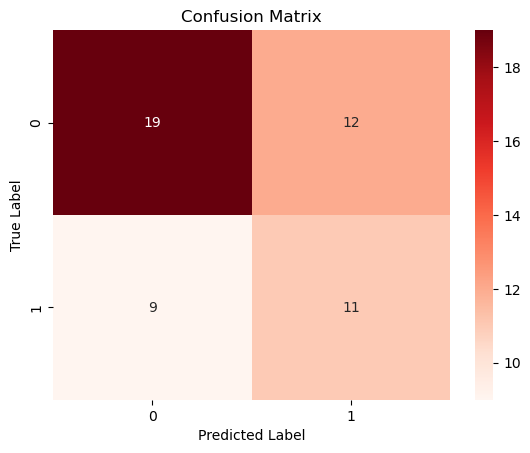

In [44]:
cm = confusion_matrix(y_test, rfc_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [45]:
roc_auc_score(y_test, rfc_pred_test, average='macro')

0.5814516129032259

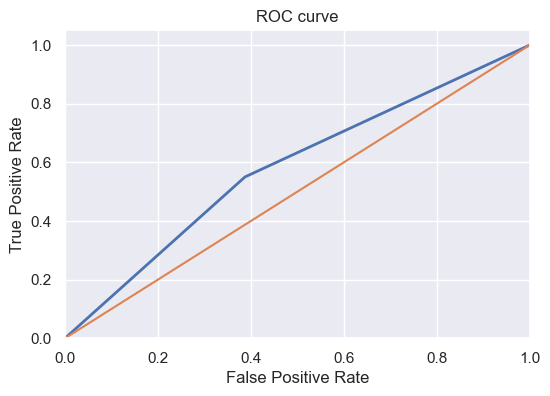

In [46]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## KNeighborsClassifier (Классификация ближайших соседей)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:

X_train_np = np.asarray(X_train)
X_test_np = np.asarray(X_test)
knn_pred_test = knn.predict(X_test_np)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [50]:
X_train_np = np.asarray(X_train)
knn_train_predict = knn.predict(X_train_np)
knn_train_predict

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [51]:
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.52      0.59        31
           1       0.46      0.65      0.54        20

    accuracy                           0.57        51
   macro avg       0.58      0.58      0.57        51
weighted avg       0.60      0.57      0.57        51



In [52]:
knn_fscore = f1_score(y_test, knn_pred_test)
knn_precision = precision_score(y_test, knn_pred_test)

print(precision_score(y_test, knn_pred_test))
print(recall_score(y_test, knn_pred_test))
print(f1_score(y_test, knn_pred_test))

0.4642857142857143
0.65
0.5416666666666667


In [53]:
knn_accuracy = accuracy_score(y_test, knn_pred_test)
knn_accuracy

0.5686274509803921

In [54]:
print('train accuracy: ', accuracy_score(y_train, knn_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, knn_pred_test, normalize=True))

train accuracy:  0.6116504854368932
test accuracy:  0.5686274509803921


In [55]:
print('test mean_squared_error: ', mean_squared_error(y_test, knn_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, knn_pred_test))

test mean_squared_error:  0.43137254901960786
test mean_absolute_error:  0.43137254901960786


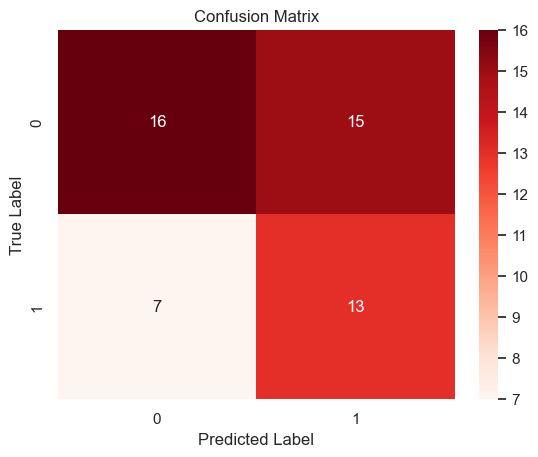

In [56]:
cm = confusion_matrix(y_test, knn_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [57]:
roc_auc_score(y_test, knn_pred_test)

0.5830645161290322

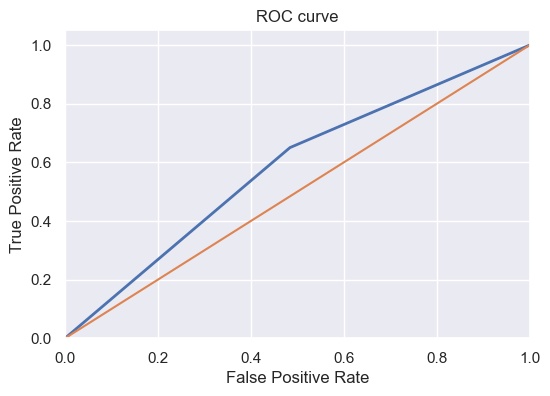

In [58]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## GradientBoostingClassifier

In [59]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [60]:
gbc_pred_test = gbc.predict(X_test)
display(gbc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [61]:
gbc_train_predict = gbc.predict(X_train)
gbc_train_predict

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [62]:
print('train accuracy: ', accuracy_score(y_train, gbc_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, gbc_pred_test, normalize=True))

train accuracy:  0.8543689320388349
test accuracy:  0.6078431372549019


In [63]:
print('test mean_squared_error: ', mean_squared_error(y_test, gbc_pred_test))
print('test mean_absolute_error: ', mean_absolute_error(y_test, gbc_pred_test))

test mean_squared_error:  0.39215686274509803
test mean_absolute_error:  0.39215686274509803


In [64]:
gbc_fscore = f1_score(y_test, gbc_pred_test)
gbc_precision = precision_score(y_test, gbc_pred_test)

print(precision_score(y_test, gbc_pred_test))
print(recall_score(y_test, gbc_pred_test))
print(f1_score(y_test, gbc_pred_test))

0.5
0.6
0.5454545454545454


In [65]:
print(classification_report(y_test, gbc_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.61      0.66        31
           1       0.50      0.60      0.55        20

    accuracy                           0.61        51
   macro avg       0.60      0.61      0.60        51
weighted avg       0.62      0.61      0.61        51



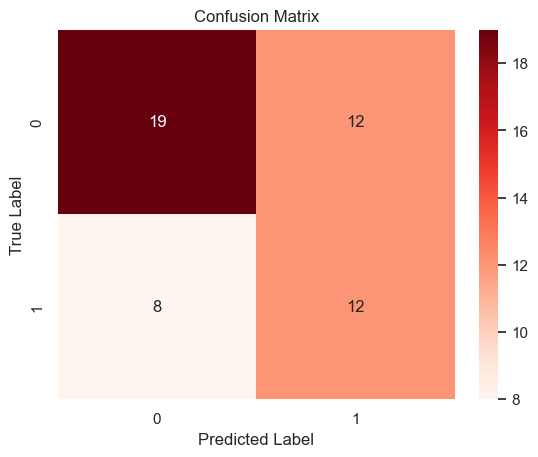

In [66]:
cm = confusion_matrix(y_test, gbc_pred_test)

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [67]:
gbc_accuracy = accuracy_score(y_test, gbc_pred_test)
gbc_accuracy

0.6078431372549019

In [68]:
roc_auc_score(y_test, gbc_pred_test)

0.6064516129032258

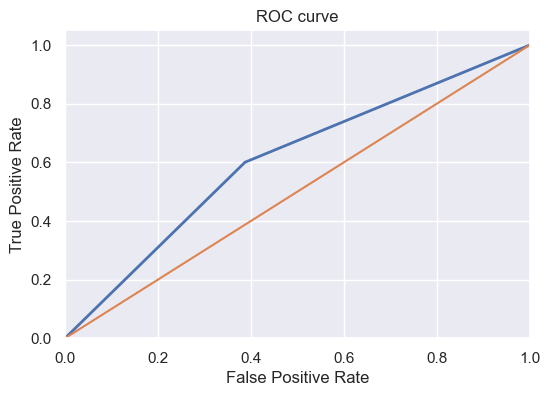

In [69]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, gbc_pred_test, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Метрики

In [70]:
classifiers =["KNeighborsClassifier",  "Random Forest Classifier", "GradientBoostingClassifier"]

log_cols = ["Classifier", "Accuracy","Precision","F1-score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, rfc_accuracy, gbc_accuracy]
log["Precision"] = [knn_precision, rfc_precision, gbc_precision]
log["F1-score"] = [knn_fscore, rfc_fscore, gbc_fscore]


In [71]:
log

,Classifier,Accuracy,Precision,F1-score
0,KNeighborsClassifier,0.568627,0.464286,0.541667
1,Random Forest Classifier,0.588235,0.478261,0.511628
2,GradientBoostingClassifier,0.607843,0.500000,0.545455


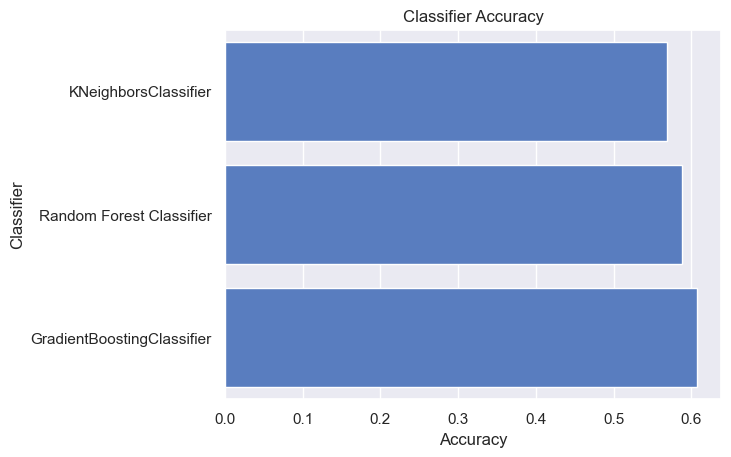

In [72]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

Модель SVC показывает лучшие результаты по всем метрикам: точность (accuracy), precision, recall и f1-score. Поэтому можно сделать вывод, что SVC является лучшей среди представленных.



## Улучшение

In [73]:

print(classification_report(y_test,gbc_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.61      0.66        31
           1       0.50      0.60      0.55        20

    accuracy                           0.61        51
   macro avg       0.60      0.61      0.60        51
weighted avg       0.62      0.61      0.61        51



In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
# defining parameter range 
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'learning_rate': [0.01,0.05, 0.1, 0.2],
    'max_depth': [2,3, 4, 5],
    'min_samples_leaf': [1, 2,3, 4]
    
}
  
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.286 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.524 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.333 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.600 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, n_estimators=100;, score=0.350 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, n_estimators=200;, score=0.286 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, n_estimators=200;, score=0.476 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=1, n_estimators=200;, score=0.381 total time=   0.0s
[CV 4/5]

[CV 3/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=4, n_estimators=300;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=4, n_estimators=300;, score=0.550 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=4, n_estimators=300;, score=0.350 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=4, n_estimators=400;, score=0.286 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=4, n_estimators=400;, score=0.571 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=4, n_estimators=400;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=4, n_estimators=400;, score=0.550 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=2, min_samples_leaf=4, n_estimators=400;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, n_esti

[CV 2/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_estimators=200;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_estimators=200;, score=0.333 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_estimators=200;, score=0.500 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_estimators=200;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_estimators=300;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_estimators=300;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_estimators=300;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_estimators=300;, score=0.500 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, n_esti

[CV 3/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=400;, score=0.333 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=400;, score=0.500 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=3, n_estimators=400;, score=0.500 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, n_estimators=100;, score=0.286 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, n_estimators=100;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, n_estimators=100;, score=0.333 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, n_estimators=100;, score=0.450 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, n_estimators=100;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, n_esti

[CV 1/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_estimators=300;, score=0.238 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_estimators=300;, score=0.381 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_estimators=300;, score=0.333 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_estimators=300;, score=0.450 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_estimators=300;, score=0.400 total time=   0.3s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_estimators=400;, score=0.286 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_estimators=400;, score=0.381 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_estimators=400;, score=0.381 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_samples_leaf=3, n_esti

[CV 3/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_estimators=100;, score=0.286 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_estimators=100;, score=0.550 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_estimators=100;, score=0.450 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_estimators=200;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_estimators=200;, score=0.381 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_estimators=200;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_estimators=200;, score=0.500 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_estimators=200;, score=0.450 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=2, min_samples_leaf=3, n_esti

[CV 4/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, n_estimators=300;, score=0.450 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, n_estimators=300;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, n_estimators=400;, score=0.381 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, n_estimators=400;, score=0.429 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, n_estimators=400;, score=0.333 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, n_estimators=400;, score=0.500 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, n_estimators=400;, score=0.400 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, n_estimators=100;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, n_esti

[CV 1/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_estimators=200;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_estimators=200;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_estimators=200;, score=0.333 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_estimators=200;, score=0.450 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_estimators=200;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_estimators=300;, score=0.333 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_estimators=300;, score=0.429 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_estimators=300;, score=0.333 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_samples_leaf=2, n_esti

[CV 2/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, n_estimators=400;, score=0.381 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, n_estimators=400;, score=0.286 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, n_estimators=400;, score=0.500 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=1, n_estimators=400;, score=0.450 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=0.286 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=0.476 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=0.333 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, n_estimators=100;, score=0.450 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=5, min_samples_leaf=2, n_esti

[CV 4/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=200;, score=0.450 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=200;, score=0.500 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=300;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=300;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=300;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=300;, score=0.400 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=300;, score=0.500 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=400;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=2, min_samples_leaf=1, n_estimators=40

[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=200;, score=0.381 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=200;, score=0.524 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=200;, score=0.286 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=200;, score=0.500 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=200;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=300;, score=0.381 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=300;, score=0.524 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=300;, score=0.286 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, n_estimators=30

[CV 3/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, n_estimators=400;, score=0.333 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, n_estimators=400;, score=0.500 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, n_estimators=400;, score=0.400 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, n_estimators=100;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, n_estimators=100;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, n_estimators=100;, score=0.333 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, n_estimators=100;, score=0.450 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, n_estimators=100;, score=0.450 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, n_estimators=20

[CV 5/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=200;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=300;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=300;, score=0.381 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=300;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=300;, score=0.600 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=300;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=400;, score=0.381 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=400;, score=0.381 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_samples_leaf=4, n_estimators=40

[CV 5/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=100;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=200;, score=0.429 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=200;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=200;, score=0.286 total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=200;, score=0.550 total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=200;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=300;, score=0.381 total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=300;, score=0.381 total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, n_estimators=30

[CV 2/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=3, n_estimators=400;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=3, n_estimators=400;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=3, n_estimators=400;, score=0.400 total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=3, n_estimators=400;, score=0.350 total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=4, n_estimators=100;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=4, n_estimators=100;, score=0.381 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=4, n_estimators=100;, score=0.476 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=4, n_estimators=100;, score=0.600 total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=2, min_samples_leaf=4, n_estimators=10

[CV 5/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=200;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=300;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=300;, score=0.381 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=300;, score=0.381 total time=   0.1s
[CV 4/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=300;, score=0.450 total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=300;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=400;, score=0.381 total time=   0.1s
[CV 2/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=400;, score=0.381 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=3, min_samples_leaf=3, n_estimators=40

[CV 1/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=200;, score=0.333 total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=200;, score=0.429 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=200;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=200;, score=0.500 total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=200;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=300;, score=0.381 total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=300;, score=0.381 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=300;, score=0.381 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=4, min_samples_leaf=3, n_estimators=30

[CV 3/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, n_estimators=400;, score=0.381 total time=   0.1s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, n_estimators=400;, score=0.500 total time=   0.1s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, n_estimators=400;, score=0.400 total time=   0.1s
[CV 1/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, n_estimators=100;, score=0.381 total time=   0.0s
[CV 2/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, n_estimators=100;, score=0.333 total time=   0.0s
[CV 3/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, n_estimators=100;, score=0.333 total time=   0.0s
[CV 4/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, n_estimators=100;, score=0.450 total time=   0.0s
[CV 5/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, n_estimators=100;, score=0.400 total time=   0.0s
[CV 1/5] END learning_rate=0.2, max_depth=5, min_samples_leaf=3, n_estimators=20

In [76]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, min_samples_leaf= 1, n_estimators= 400)
gbc.fit(X_train, y_train)

print(classification_report(y_test,gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        31
           1       0.44      0.55      0.49        20

    accuracy                           0.55        51
   macro avg       0.55      0.55      0.54        51
weighted avg       0.57      0.55      0.55        51



In [77]:
print(classification_report(y_test,knn_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.52      0.59        31
           1       0.46      0.65      0.54        20

    accuracy                           0.57        51
   macro avg       0.58      0.58      0.57        51
weighted avg       0.60      0.57      0.57        51



In [78]:
# Hyperparameter tuning
param_grid = {'n_neighbors': [1,2,3,4,5,6]}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'n_neighbors': 6}


In [79]:
# Создание и обучение модели
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test.values)
knn_accuracy_upd = accuracy_score(y_test, y_pred)
print(f'Accuracy: {knn_accuracy_upd}')


Accuracy: 0.5686274509803921


In [80]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        31
           1       0.45      0.50      0.48        20

    accuracy                           0.57        51
   macro avg       0.55      0.56      0.55        51
weighted avg       0.58      0.57      0.57        51



In [81]:
print(classification_report(y_test,rfc_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64        31
           1       0.48      0.55      0.51        20

    accuracy                           0.59        51
   macro avg       0.58      0.58      0.58        51
weighted avg       0.60      0.59      0.59        51



In [82]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=3,
                       n_estimators=25)


In [83]:
rfc = RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)
rfc.fit(X_train,y_train)
rfc_pred_test = rfc.predict(X_test)

rfc_accuracy_upd = accuracy_score(y_test, rfc_pred_test)
rfc_accuracy_upd

0.5294117647058824

In [84]:

print(classification_report(y_test,rfc_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57        31
           1       0.42      0.55      0.48        20

    accuracy                           0.53        51
   macro avg       0.53      0.53      0.52        51
weighted avg       0.55      0.53      0.53        51



## Вывод

Просмотрели данные и узнали, что и женщины и мужчины любят холодные цвета.
Женщины предпочитают Поп-музыку, а парни - Рок. Большинство мужчин и женщин не пьют, а среди остальных любимый напиток женщин - вино, мужчин - пиво. И мужчины и женщины предпочитают Колу/Пепси.

Выборка является немного несбалансированной- количество мужчин 73, женщин - 81 
Обучили несколько моделей: Knn, Random Forest, GradientBoostingClassifier. Среди них лучшие показатели у GradientBoosting.
Она обладает лучшими значениями у precision, recall, f1-score 